In [ ]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://repo.ai.gato/registry/repository/pypi-proxy/simple
  Using cached http://repo.ai.gato/registry/repository/pypi-proxy/packages/fsspec/2024.12.0/fsspec-2024.12.0-py3-none-any.whl (183 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.12.0 requires numba-cuda<0.0.18,>=0.0.13, which is not installed.
s3fs 2025.2.0 requires fsspec==2025.2.0.*, but you have fsspec 2024.12.0 which is incompatible.
cudf-cu12 24.12.0 requires pyarrow<19.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 19.0.1 which is incompatible.


## 데이터 로드



1.   KorQuAD 데이터셋 로드
2.   데이터셋 구조 확인
 - 데이터에 DatasetDict 형태로 train, validation 데이터가 포함된 것을 확인

3. 샘플 데이터 출력
 - context: 질문에 대한 본문
 - question ; 본문의 내용
 - answer : 정답 및 정답의 본문 시작 위치



In [ ]:
from datasets import load_dataset

# 데이터셋 로드
dataset = load_dataset("KorQuAD/squad_kor_v1")

# 데이터 확인
print(dataset)
print(dataset["train"][0])  # 첫 번째 샘플 출력

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 60407
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 5774
    })
})
{'id': '6566495-0-0', 'title': '파우스트_서곡', 'context': '1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, 그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가 하는 의견도 있다.', 'questi

In [ ]:
!pip install -U transformers

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://repo.ai.gato/registry/repository/pypi-proxy/simple


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Traceback (most recent call last):e visible): 
  File "/opt/python/bin/huggingface-cli", line 8, in <module>
    sys.

## Input 데이터의 토큰 총 수 확인

In [ ]:
# LLaMA 토크나이저 로드
from transformers import AutoTokenizer

# 모델 선택
MODEL_NAME = "meta-llama/Llama-3.2-1B"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# 예제 데이터
context = """1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, 그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가 하는 의견도 있다."""

question = "바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?"

# 질문 + 본문을 하나의 입력으로 합침
input_text = f"Q: {question}\nContext: {context}\nA:"

# 토큰화 및 토큰 개수 확인
tokenized_input = tokenizer(input_text, truncation=False)  # truncation=False로 전체 길이 확인

# 토큰 개수 출력
len(tokenized_input["input_ids"])


tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

467

## 모델 설정 및 데이터 전처리

KorQuAD 데이터셋을 학습하기 위해 사전학습된 QA모델을 설정하고, 입려 데이터를 모델이 학습가능한 형태로 전처리

1. 모델과 토크나이저 설정
    - meta-llama 모델로 설정
2. 전처리 함수 정의
    - 입력데이터 생성 : f"Q: {question}\nContext: {context}\nA:" 형태로 입력을 생성
    - 토큰화 및 매핑 설정
    - 정답 위치 계산 : answer_text를 통해 정답 시작위치를 context에서 찾고, mapping을 통해 토큰 단위의 시작/끝 위치를 계산
    - 토큰화된 입력 데이터에 정답 위치 추가 : start_position와 end_position을 입력 데이터에 추가

3. 학습 및 검증 데이터 전처리

In [ ]:
from transformers import AutoTokenizer

# 모델
MODEL_NAME = "meta-llama/Llama-3.2-1B"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# 토큰 설정
tokenizer.pad_token = tokenizer.eos_token

def preprocess_function(examples):
    inputs = []
    start_positions = []
    end_positions = []

    for question, context, answers in zip(examples["question"], examples["context"], examples["answers"]):
        answer_text = answers["text"][0]  # 첫 번째 정답만 사용
        answer_start = answers["answer_start"][0]

        # 입력 데이터 생성
        input_text = f"Q: {question}\nContext: {context}\nA:"
        inputs.append(input_text)

        # 토크나이징
        tokenized_input = tokenizer(input_text, max_length=512, truncation=True, return_offsets_mapping=True)
        offsets = tokenized_input['offset_mapping']

        # context에서 정답의 시작 위치 찾기
        start_idx = context.find(answer_text)
        if start_idx == -1:
            print(f"Error: Answer '{answer_text}' not found in context.")
            start_positions.append(0)
            end_positions.append(0)
            continue

        end_idx = start_idx + len(answer_text)

        # offset_mapping을 사용하여 start/end positions 찾기
        start_token_idx = None
        end_token_idx = None

        for idx, (start, end) in enumerate(offsets):
            if start == start_idx:
                start_token_idx = idx
            if end == end_idx:
                end_token_idx = idx

        if start_token_idx is None:
            start_token_idx = 0
        if end_token_idx is None:
            end_token_idx = len(offsets) - 1

        start_positions.append(start_token_idx)
        end_positions.append(end_token_idx)

    # 입력 데이터 토큰화
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True, padding="max_length")
    model_inputs["start_positions"] = start_positions
    model_inputs["end_positions"] = end_positions

    return model_inputs

# 데이터셋 변환
tokenized_train = dataset["train"].map(preprocess_function, batched=True)
tokenized_val = dataset["validation"].map(preprocess_function, batched=True)

Map:   0%|          | 0/60407 [00:00<?, ? examples/s]

Map:   0%|          | 0/5774 [00:00<?, ? examples/s]

## LoRA 적용

1. LoraConfig 설정
    - LoRA 랭크 설정 : r = 8 로 메모리 사용 줄임
    - LoRA 스케일링 계수 설정
    - LoRA 적용 대상 모듈 지정
    - 드롭아웃 설정으로 과적합 장지

trainable params: 851,968 || all params: 1,236,670,466 || trainable%: 0.0689
- LoRA 적용 후 학습 가능한 파라미터수와 전체 파라미터수 확인


In [ ]:
from transformers import AutoModelForQuestionAnswering
from peft import LoraConfig, get_peft_model

#  모델 불러오기
model = AutoModelForQuestionAnswering.from_pretrained(MODEL_NAME)

# LoRA 설정 추가
lora_config = LoraConfig(
    r=8,  # LoRA 랭크 (메모리 절약 가능)
    lora_alpha=16,  # LoRA 스케일링 계수
    target_modules=["q_proj", "v_proj"],  # LoRA 적용할 모듈 (LLaMA 계열은 q_proj, v_proj 추천)
    lora_dropout=0.1,  # LoRA 드롭아웃 비율
    bias="none",
)

# 기존 모델을 LoRA 모델로 변환
model = get_peft_model(model, lora_config)

# 학습 가능한 파라미터 확인 (LoRA 적용 확인용)
model.print_trainable_parameters()



Some weights of LlamaForQuestionAnswering were not initialized from the model checkpoint at meta-llama/Llama-3.2-1B and are newly initialized: ['embed_tokens.weight', 'layers.0.input_layernorm.weight', 'layers.0.mlp.down_proj.weight', 'layers.0.mlp.gate_proj.weight', 'layers.0.mlp.up_proj.weight', 'layers.0.post_attention_layernorm.weight', 'layers.0.self_attn.k_proj.weight', 'layers.0.self_attn.o_proj.weight', 'layers.0.self_attn.q_proj.weight', 'layers.0.self_attn.v_proj.weight', 'layers.1.input_layernorm.weight', 'layers.1.mlp.down_proj.weight', 'layers.1.mlp.gate_proj.weight', 'layers.1.mlp.up_proj.weight', 'layers.1.post_attention_layernorm.weight', 'layers.1.self_attn.k_proj.weight', 'layers.1.self_attn.o_proj.weight', 'layers.1.self_attn.q_proj.weight', 'layers.1.self_attn.v_proj.weight', 'layers.10.input_layernorm.weight', 'layers.10.mlp.down_proj.weight', 'layers.10.mlp.gate_proj.weight', 'layers.10.mlp.up_proj.weight', 'layers.10.post_attention_layernorm.weight', 'layers.10.s

trainable params: 851,968 || all params: 1,236,670,466 || trainable%: 0.0689


## 학습 파라미터 설정 및 Trainer 설정

In [ ]:
from transformers import TrainingArguments, Trainer

# 학습 파라미터 설정
training_args = TrainingArguments(
    output_dir="./results",  # 모델 저장 경로
    learning_rate=5e-5,   # 학습률 설정
    lr_scheduler_type="cosine",    # 스케쥴러 사용
    evaluation_strategy="steps",
    save_strategy="epoch",    # 체크포인트 저장
    per_device_train_batch_size=1,  # batchsize 설정
    per_device_eval_batch_size=1,
    num_train_epochs=3,    # epoch 설정
    weight_decay=0.001,
    logging_dir="./logs",
    logging_steps=2000,  # 2000 step마다 로그 출력
    fp16=True,    # 16bit 연산
    gradient_accumulation_steps=1,
    dataloader_num_workers=1,   #데이터 로드에 사용할 워커 수
    label_names=["start_positions", "end_positions"],
    report_to="wandb",   # wandb로 파라미터 저장
)



# Trainer 설정
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,  # 훈련 데이터
    eval_dataset=tokenized_val,  # 검증 데이터
    tokenizer=tokenizer,
)

# 학습 시작
trainer.train()


/usr/gatoai/python/venv/3.10/lib/python3.10/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_6932/4245021489.py:26: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Step,Training Loss,Validation Loss
2000,5.318300,4.686903
4000,4.447600,4.385688
6000,4.265300,4.433066
8000,4.283000,4.342015
10000,4.310500,4.413645
12000,4.268700,4.230995
14000,4.257600,4.255924
16000,4.190700,4.189455
18000,4.235900,4.181887
20000,4.195700,4.223425


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

TrainOutput(global_step=181221, training_loss=4.147514434744904, metrics={'train_runtime': 52758.2547, 'train_samples_per_second': 3.435, 'train_steps_per_second': 3.435, 'total_flos': 1.0844752816087327e+18, 'train_loss': 4.147514434744904, 'epoch': 3.0})

## 모델 학습 loss 시각화

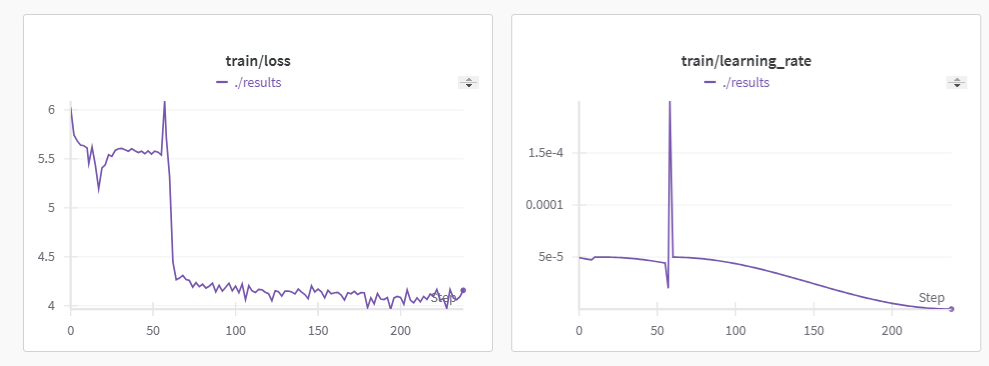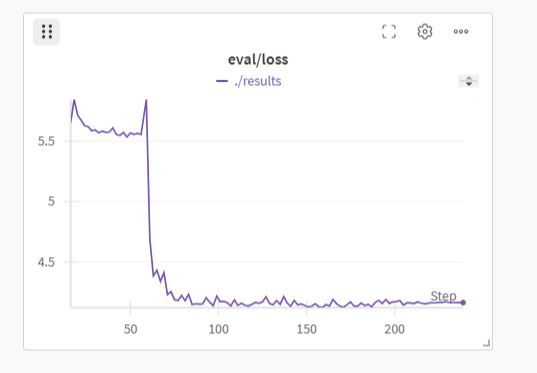

###  분석 및 고찰

1. 학습 및 검증 Loss 분석
  - 위 그래프에서 Training Loss와 Validation Loss의 변화가 다소 평탄하게 진행되며, 급격한 감소 후에 안정화되는 패턴을 보입니다.
  - 초기에 Validation Loss가 급격히 감소했지만, 이후 꾸준히 줄어들지 않는 문제가 발생했습니다.
  - Training Loss와 Validation Loss 간의 차이가 크지 않으며, 전반적으로 Loss가 4 이상에 머무르는 경향이 있습니다.



### 원인 분석


  1.  학습률 문제
    - 학습률을 5e-5로 설정했지만, train/learning_rate 그래프에서 학습률이 급격히 변하는 구간이 존재합니다.
    - Cosine Scheduler를 사용하면서 학습률이 급격히 낮아지거나 불안정한 상태가 발생한 것으로 보입니다.

2. 배치 크기 및 메모리 문제
  - per_device_train_batch_size와 per_device_eval_batch_size를 1로 설정하여 매우 작은 배치 크기로 학습을 진행하였습니다.
  - 배치 크기가 너무 작을 경우 모델이 학습하는 정보의 양이 제한되기 때문에, Loss 감소 속도가 느려지는 경우가 생길 수 있다고 생각합니다.

### 개선 방안

1. 학습률 조정
 - 5e-5를 더 낮은 값으로 수정
 - cosine sceduler 대신 linear schedular를 사용

2. 배치 크기 조정
 -  gradient_accumulation_steps를 조정하거나 batch_size를 늘려 더 많은 데이터를 한 번에 학습할 수 있도록 설정


### LLAMA
 - LLaMA는 Meta AI에서 개발한 대규모 언어 모델로, 텍스트 생성, 질의응답, 언어 이해와 같은 다양한 NLP(Natural Language Processing) 태스크에 사용됩니다.
 - Transformer 기반으로 동작하며, 다양한 NLP 태스크에서 더 적은 자원으로 높은 성능을 보여줍니다

### LORA
  - LoRA는 사전 학습된 모델의 일부 모듈에만 저차원 학습을 적용하여 메모리 사용을 줄이고 학습 호율을 높이는 기법입니다.
  - LLaMA에 LoRA를 적용하여 효율적인 학습을 유도했고, 모든 파라미터를 학습하지 않고 일부 모듈만 학습하여 메모리 사용량을 줄여 학습을 진행했습니다.